In [58]:
import numpy as np
import pandas as pd
from pathlib import Path
import csv
%matplotlib inline

In [59]:
# bring in portfolios
aapl_data = Path("../../rice-hou-fin-pt-09-2020-u-c/hw/04-Pandas/Instructions/Starter_Code/Resources/aapl_historical.csv")
returns_data = Path("../../rice-hou-fin-pt-09-2020-u-c/hw/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv")
cost_data = Path("../../rice-hou-fin-pt-09-2020-u-c/hw/04-Pandas/Instructions/Starter_Code/Resources/cost_historical.csv")
goog_data = Path("../../rice-hou-fin-pt-09-2020-u-c/hw/04-Pandas/Instructions/Starter_Code/Resources/goog_historical.csv")
sp500_data = Path("../../rice-hou-fin-pt-09-2020-u-c/hw/04-Pandas/Instructions/Starter_Code/Resources/sp500_history.csv")
whale_data = Path("../../rice-hou-fin-pt-09-2020-u-c/hw/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv")

In [116]:
# Convert to DateTimeIndex
aapl = pd.read_csv(aapl_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
returns = pd.read_csv(returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
cost = pd.read_csv(cost_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog = pd.read_csv(goog_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
sp500 = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [197]:
# detect nulls for aapl
aapl.isnull().sum().sum()

0

In [198]:
#detect nulls for returns 
## originally ran this as a not .sum.sum but .values.any(), then resaved, so now null count shows 0 instead of what was originally there before dropping nulls
returns.isnull().sum().sum()

0

In [199]:
# detect nulls for cost
cost.isnull().sum().sum()

0

In [200]:
# detect nulls for goog
goog.isnull().sum().sum()

0

In [131]:
# detect nulls for sp500 with .sum.sum 
sp500.isnull().sum().sum()


0

In [132]:
# detect nulls for whale
whale.isnull().sum().sum()

4

In [142]:
# remove nulls for whale & returns
whale = whale.dropna()
returns = returns.dropna()

In [203]:
aapl

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,AAPL,186.99
2018-05-16,AAPL,188.18
2018-05-15,AAPL,186.44


In [170]:
# remove $ sign from sp500
sp500["Close"] =sp500["Close"].str.replace("$","")

In [195]:
# convert sp500 data type to int
pd.to_numeric(sp500)

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: float64

In [196]:
# convert sp500 from close to daily returns
sp500_daily = sp500.pct_change()
sp500_daily = sp500_daily.dropna()
sp500_daily.head()


Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
Name: Close, dtype: float64

In [221]:
#combine whale, algo returns, and sp500 to one df

combined_df = pd.concat([returns,sp500_daily, whale], axis="columns", join="inner")
combined_df.sort_index(inplace=True)
combined = combined_df.rename(columns={"Close":"S&P 500"})


In [222]:
combined

,Algo 1,Algo 2,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,0.004408,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.008589,0.002416,-0.001195,0.002230,0.003241,-0.002534,0.004213
2015-03-05,-0.000955,0.004323,0.014378,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.004957,-0.011460,-0.003929,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.005447,0.001303,0.017254,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
2019-04-15,-0.004331,-0.004572,-0.000509,-0.001422,-0.001156,0.000398,-0.010492
2019-04-16,-0.006945,0.002899,0.002279,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.010301,-0.005228,-0.001577,-0.002897,-0.006467,-0.004409,0.003222


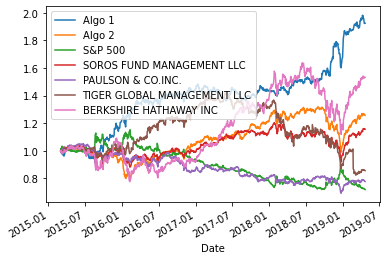

In [229]:
# calculate and plot cumulative returns 
cumulative_returns = (1 + combined).cumprod()
cumulative_returns.plot()